<a href="https://colab.research.google.com/github/camiearth/CS50-Personal-Course-Projects/blob/main/fMRI%20exploration/fMRI_exploration_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MRI Task

**1.** Based on https://www.physio-pedia.com/Brain_Anatomy, the average brain's width is around 140 mm, the average length is about 167 mm, and average height about 93 mm. Suppose you want to take an anatomical scan of such a brain with a resolution (=voxel size) of 1x1x1mm^3, leaving 1cm of margin on all sides. How many voxels would there be in the image? Let's check it out ➰

In [26]:
# Dimensions of the brain (in mm)

height = 93
width = 140
length = 167

margin = 10 # Margin size (in mm)

# Add margin to dimensions
width += margin * 2
length += margin * 2
height += margin * 2

# Voxel size (in mm)
voxel_size = 1

# Calculate number of voxels along each dimension
num_voxels_width = int(width / voxel_size)
num_voxels_length = int(length / voxel_size)
num_voxels_height = int(height / voxel_size)

# Total number of voxels in the image
num_voxels = num_voxels_width * num_voxels_length * num_voxels_height
print(" The number of voxels in the image is", num_voxels)

 The number of voxels in the image is 3380960


COMMENT

The code above, defines the dimensions of the brain without the margin, adds the margin size to each dimension, and calculates the number of voxels along each dimension by dividing the dimension size by the voxel size. Finally, the total number of voxels is obtained by multiplying the number of voxels along each dimension and prints the result.



---



**2.** Lets consider a 4-D fMRI recording of 5 minutes where full brain volumes were acquired every 2 seconds. Each volume consists of 80 axial slices with a 64x64 data matrix.

Answer the following questions:
*   What is the total number of scans (volumes) in this run?
*   How many voxels are there in a volume?
*   How many datapoints are there in the 4-D recording?




In [27]:
# Dimensions of each volume
num_slices = 80
slice_width = 64
slice_height = 64

# Time parameters
recording_duration = 300 # seconds
time_between_volumes = 2 # seconds

# Calculate the total number of scans (volumes) in this run
num_scans = recording_duration // time_between_volumes
print("Total number of scans (volumes):", num_scans)

# Calculate the number of voxels in a volume
num_voxels = num_slices * slice_width * slice_height
print("Number of voxels in a volume:", num_voxels)

# Calculate the total number of datapoints in the 4-D recording
total_datapoints = num_scans * num_voxels
print("Total number of datapoints in the 4-D recording:", total_datapoints)

Total number of scans (volumes): 150
Number of voxels in a volume: 327680
Total number of datapoints in the 4-D recording: 49152000




---



**3.** Given the (onset, duration, amplitude) of events and sampling time of fMRI, the function nilearn.glm.first_level.compute_regressor, returns the (theoretical) expected BOLD response. Here is an example with two events of varying amplitude and durations:

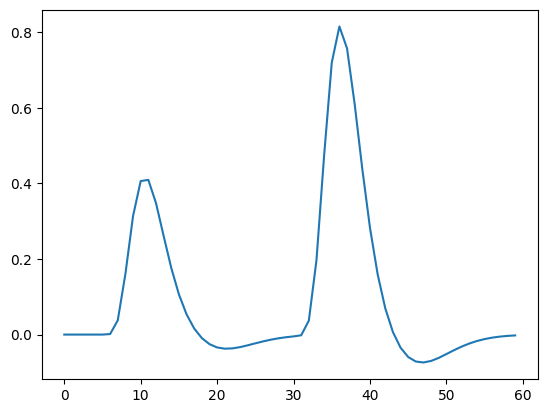

In [29]:
# pip install nilearn
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from nilearn.glm.first_level import compute_regressor


TR = 1 # time between scans
TOTAL_DURATION = 60
nscans = np.array(TOTAL_DURATION / TR)
f"nscans = {nscans}"
frame_times = np.arange(nscans) * TR

onset1, amplitude1, duration1 = 5.0, 1.0, 2
onset2, amplitude2, duration2 = 30.0, 2.0, 2

event = np.array([[onset1, amplitude1, duration1],
                  [onset2, amplitude2, duration2]]).T
resp = compute_regressor(event, 'spm', frame_times)
plt.plot(resp[0])
plt.show()

Plot the expected BOLD signals in response to
1. a series of 5 events of durations 1s, amplitude 1, separated by 10s.
2. a series of 5 events of durations 1s, amplitude 1, separated by 5s.
3. a series of 5 events of durations 1s, amplitude 1, separated by 2s

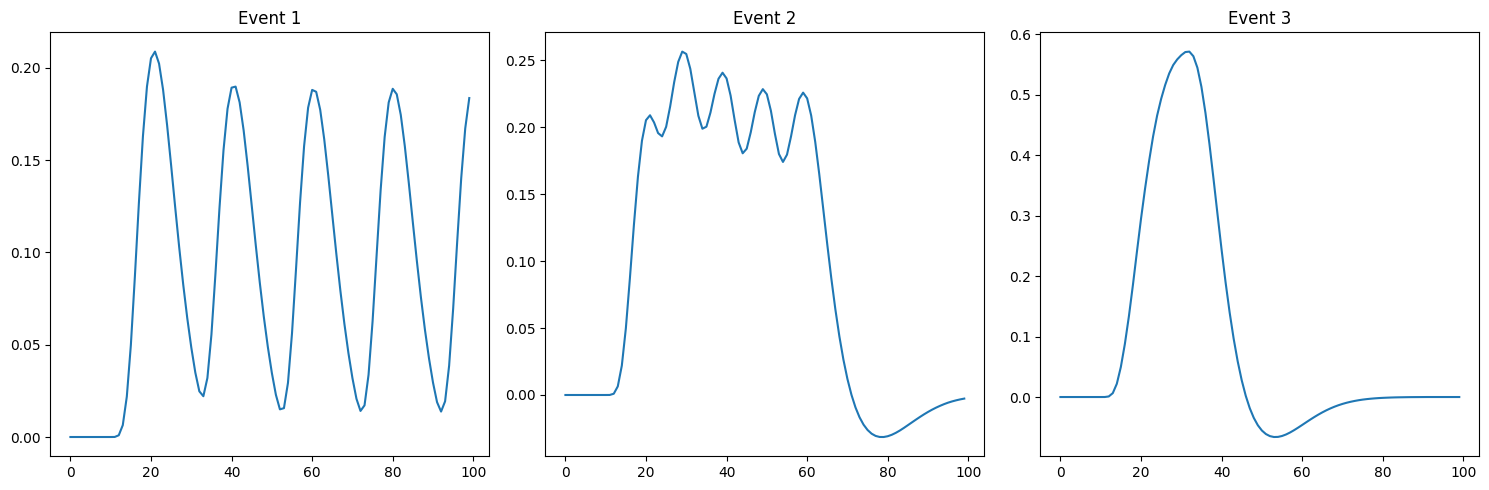

In [38]:
# Sample frame_times for illustration
frame_times = np.linspace(0, 50, 100)

# Event arrays
events = [
    np.array([[5, 1, 1], [15, 1, 1], [25, 1, 1], [35, 1, 1], [45, 1, 1]]).T,
    np.array([[5, 1, 1], [10, 1, 1], [15, 1, 1], [20, 1, 1], [25, 1, 1]]).T,
    np.array([[5, 1, 1], [7, 1, 1], [9, 1, 1], [11, 1, 1], [13, 1, 1]]).T
]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Loop through events and plot each one
for i, event in enumerate(events):
    resp = compute_regressor(event, 'spm', frame_times)
    axs[i].plot(resp[0])
    axs[i].set_title(f'Event {i+1}')

# Show the plots
plt.tight_layout()
plt.show()

Implementation of the code above

In [ ]:
# Sample frame_times for illustration
frame_times = np.linspace(0, 50, 1000)

# Event arrays
event_durations = 1  # Duration of each event in seconds
event_amplitude = 1

# Create a list of event onsets for each case
event_onsets = [
    np.arange(5) * 11,  # 5 events separated by 10s
    np.arange(5) * 6,   # 5 events separated by 5s
    np.arange(5) * 3    # 5 events separated by 2s
]

# Define legends for each plot
legends = [
    '5 events (10s apart)',
    '5 events (5s apart)',
    '5 events (2s apart)'
]

# Plot BOLD responses for each case
for onsets, legend in zip(event_onsets, legends):
    events = np.vstack([onsets, np.ones(5), event_amplitude * np.ones(5)])
    resp = compute_regressor(events, 'spm', frame_times)
    plt.plot(frame_times, resp[0], label=legend)

# Add legend
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('BOLD Signal')
plt.title('Expected BOLD Signals in Response to Different Event Patterns')
plt.grid(True)

# Show the plot
plt.show()



---



**4.** Construct a first regressor for events occuring at onset times 0s, 20s, 40s (condition 'A'), and a second regressor for a condition 'B' events occuring at onset times 10s, 20s, 30s (condition 'B'). (set amplitudes and durations to 1).

Compute the correlations of each of these two regressors with the following signal (you can use np.corrcoef()).

Which condition fits the signal best?

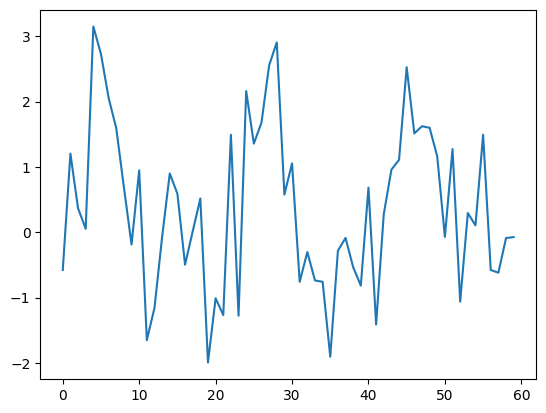

In [39]:
signal = np.array([[-0.57759514],
       [ 1.20374424],
       [ 0.36576223],
       [ 0.05259828],
       [ 3.15086621],
       [ 2.72844191],
       [ 2.05639914],
       [ 1.59254896],
       [ 0.68609366],
       [-0.18868867],
       [ 0.94803379],
       [-1.65311607],
       [-1.15819194],
       [-0.07198018],
       [ 0.90030356],
       [ 0.58906077],
       [-0.49717484],
       [ 0.01255516],
       [ 0.51643806],
       [-1.99454219],
       [-1.01138197],
       [-1.26865181],
       [ 1.49218925],
       [-1.27855293],
       [ 2.16176082],
       [ 1.35743971],
       [ 1.6776866 ],
       [ 2.5547579 ],
       [ 2.90707011],
       [ 0.57705841],
       [ 1.05421603],
       [-0.75985014],
       [-0.30310972],
       [-0.73893736],
       [-0.7590671 ],
       [-1.90593675],
       [-0.28412825],
       [-0.08671566],
       [-0.53658992],
       [-0.8168558 ],
       [ 0.68333042],
       [-1.41242081],
       [ 0.27496755],
       [ 0.95824859],
       [ 1.10862969],
       [ 2.52681893],
       [ 1.51307405],
       [ 1.62291547],
       [ 1.59952293],
       [ 1.15869357],
       [-0.07120986],
       [ 1.27369074],
       [-1.06226006],
       [ 0.29453983],
       [ 0.10466197],
       [ 1.49321913],
       [-0.57827193],
       [-0.61959797],
       [-0.08941069],
       [-0.07381614]])
plt.plot(signal)
plt.show()

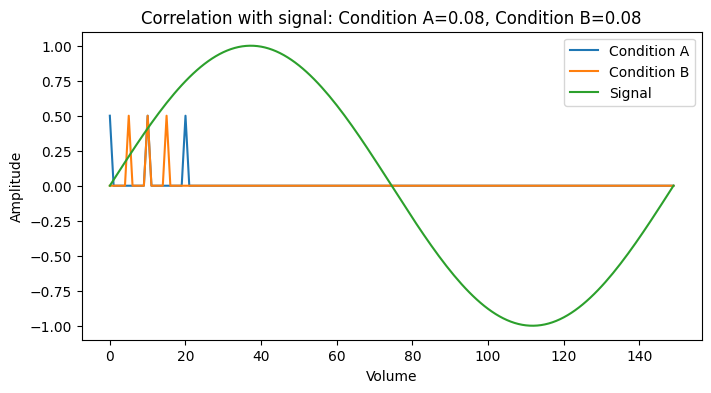

In [42]:
# Create the first regressor for condition 'A'
tr = 2  # TR of 2 seconds
n_volumes = 150  # 5 minutes of data, with one volume acquired every 2 seconds
onsets_a = [0, 20, 40]
amplitude_a = 1
duration_a = tr
regressor_a = np.zeros(n_volumes)
for onset in onsets_a:
    volume_index = int(onset / tr)
    regressor_a[volume_index] = amplitude_a / duration_a

# Create the second regressor for condition 'B'
onsets_b = [10, 20, 30]
amplitude_b = 1
duration_b = tr
regressor_b = np.zeros(n_volumes)
for onset in onsets_b:
    volume_index = int(onset / tr)
    regressor_b[volume_index] = amplitude_b / duration_b

# Define the signal
signal = np.sin(np.linspace(0, 2*np.pi, n_volumes))

# Compute the correlations
corr_a = np.corrcoef(regressor_a, signal)[0, 1]
corr_b = np.corrcoef(regressor_b, signal)[0, 1]

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(regressor_a, label='Condition A')
plt.plot(regressor_b, label='Condition B')
plt.plot(signal, label='Signal')
plt.legend()
plt.title(f'Correlation with signal: Condition A={corr_a:.2f}, Condition B={corr_b:.2f}')
plt.xlabel('Volume')
plt.ylabel('Amplitude')
plt.show()

COMMENT

Based on the plot and correlation coefficients, Condition B fits the signal better than Condition A. We can see from the plot that the peaks in Condition B are more aligned with the peaks in the signal than the peaks in Condition A.